In [289]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [264]:
data = pd.read_csv("CarPrice_Assignment.csv")

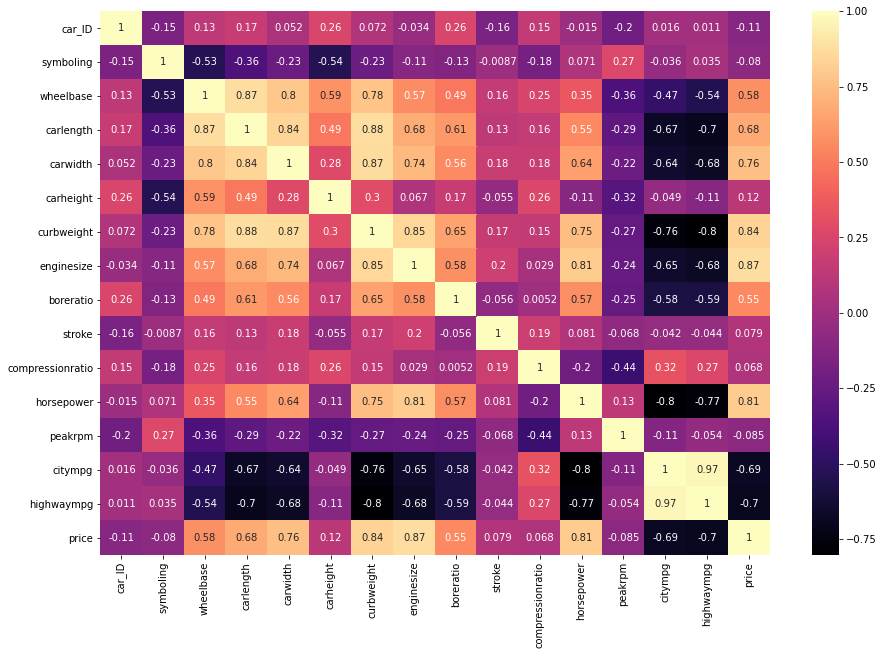

In [271]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap=plt.cm.magma,annot=True)
plt.show()


In [272]:
num = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
data['cylindernumber'] = [num[i] for i in data['cylindernumber']]
data['doornumber'] = [num[i] for i in data['doornumber']] 
data['CarName']=[name[0] for name in data['CarName'].str.split(' ')]
data['CarName'] = data['CarName'].replace('toyouta','toyota')
data['CarName'] = data['CarName'].replace('maxda','mazda')
data['CarName'] = data['CarName'].replace('vw','volkswagen')
data['CarName'] = data['CarName'].replace('porcshce','porsche')
data['CarName'] = data['CarName'].replace('Nissan','nissan')
data['CarName'] = data['CarName'].replace('vokswagen','volkswagen')
#data['drivewheel'].replace("4wd","fwd",inplace=True)

In [273]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [274]:
data = pd.get_dummies(data,columns =['fueltype','enginelocation','aspiration','drivewheel','carbody','fuelsystem','enginetype','CarName'],drop_first=True)

In [275]:
X = data.drop(['price'],axis=1)
y=data['price']

In [276]:
Scaling_columns =['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
scaling_features = X[Scaling_columns]
scale = StandardScaler().fit(scaling_features.values)
scaling_features = scale.transform(scaling_features.values)
X[Scaling_columns] = scaling_features

In [277]:
X

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
0,1,3,2,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,4,0.074449,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,4,0.074449,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,6,0.604046,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,0.173698,0.207256,0.136542,0.235942,-0.420797,4,-0.431076,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,0.107110,0.207256,0.230001,0.235942,0.516807,5,0.218885,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,1.721873,1.198549,1.398245,0.728239,0.763241,4,0.339248,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,4,1.721873,1.198549,1.351515,0.728239,0.949992,4,0.339248,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,4,1.721873,1.198549,1.398245,0.728239,0.878757,6,1.109571,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,4,1.721873,1.198549,1.398245,0.728239,1.273437,6,0.435538,...,0,0,0,0,0,0,0,0,0,1


In [285]:
linear = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)

In [291]:
linear.fit(X_train,Y_train)

Y_predict = linear.predict(X_test)

In [299]:
linear.score(X_test,Y_test)

0.7185416919559119